In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings

## Опис обраного датасету
### Назва: Diabetes Dataset
### Автор: AKSHAY DATTATRAY KHARE
### Посилання:
https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
### Опис:
Цей набір даних першочергово зібрано в Національному інституті діабету, травлення і хвороб нирок. Мета набору даних полягає в тому, щоб діагностично передбачити, чи є у пацієнта діабет, на основі певних діагностичних вимірювань, включених до набору даних. Було накладено кілька обмежень на вибір цих показників з більшої бази даних. Зокрема, всі пацієнти тут - жінки старше 21, індійської спадщини Піма (перекладено зі сторінки датасету на Kaggle
### Наявні колонки:
Pregnancies: Кількість вагітностей
Glucose: Рівень глюкози у крові
BloodPressure: Кров'яний тиск
SkinThickness: Товщина шкірного покриву
Insulin: Рівень інсуліну к крові
BMI: Індекс маси тіла
DiabetesPedigreeFunction: Генетична схильність до діабету
Age: Вік
Outcome: Результат 1 - так (людина хвора на діабет) 0 - ні.

In [32]:
diabetes_df = pd.read_csv('diabetes.csv', sep = ',')

In [33]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
diabetes_df.shape

(768, 9)

In [36]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

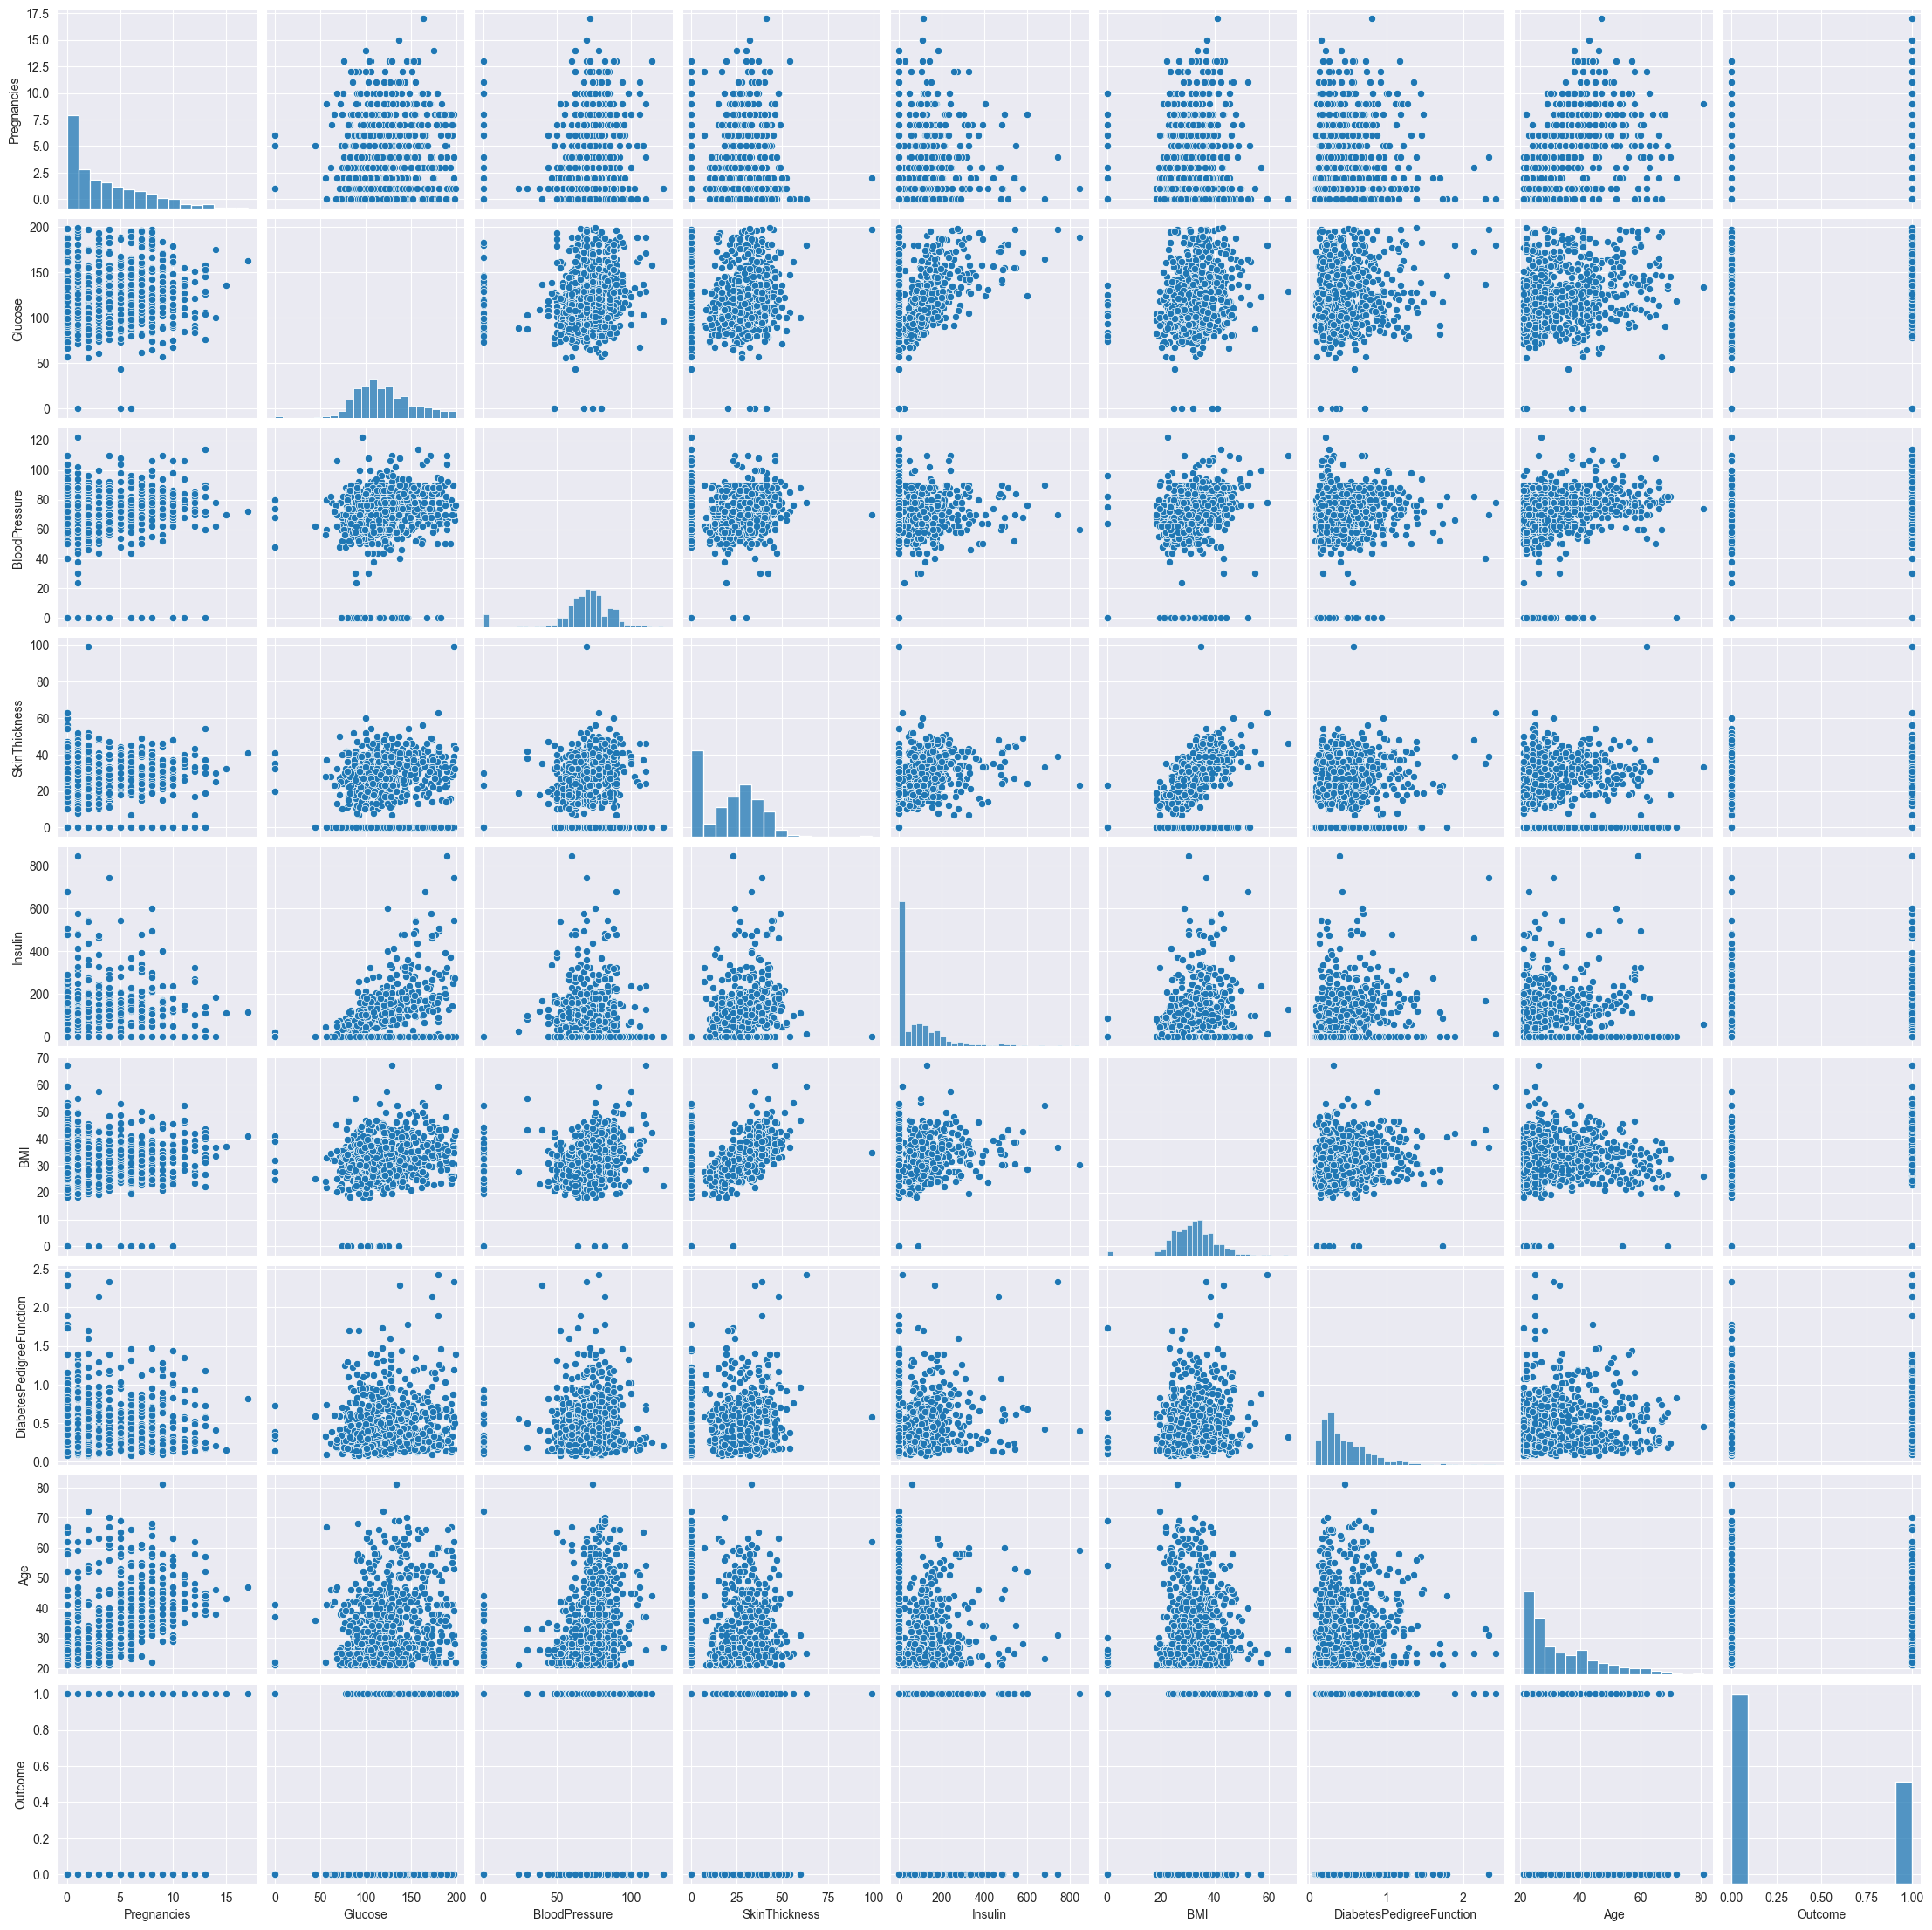

In [61]:
sns.pairplot(diabetes_df)

<Axes: >

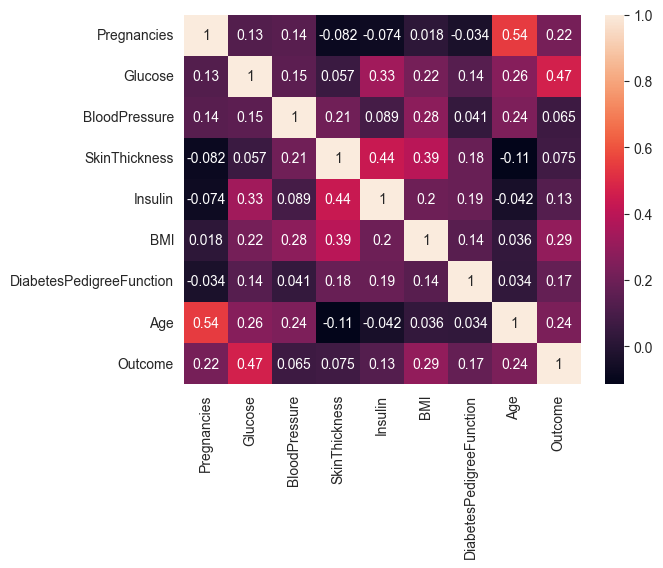

In [37]:
sns.heatmap(diabetes_df.corr(),annot=True,)

In [38]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Датасет не містить порожніх значень та значень, що мають високий коефіцієнт кореляції, тож не потребує додаткового дозаповнення чи усунення тих чи інших параметрів із датасету.

In [39]:
features = diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [40]:
features = features.to_numpy()
target = diabetes_df['Outcome'].to_numpy()

In [41]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
features

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

<Axes: xlabel='Outcome', ylabel='count'>

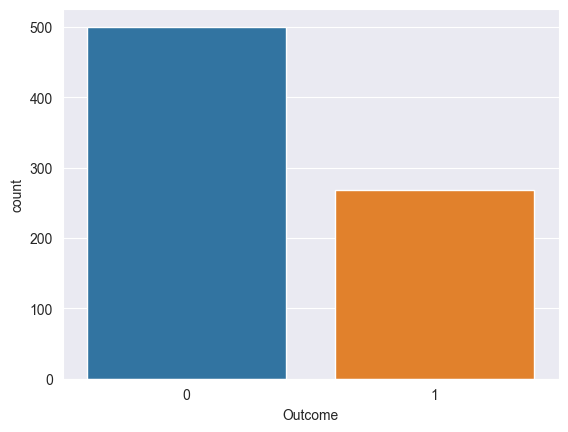

In [42]:
sns.countplot(data = diabetes_df, x = 'Outcome')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [44]:
X_train

array([[-1.14185152,  0.5040552 , -0.05715025, ..., -0.91287659,
        -0.99324546, -1.04154944],
       [ 0.3429808 , -0.5287506 ,  0.25303625, ..., -0.40519961,
        -0.96304428,  1.2558199 ],
       [-0.25095213,  0.06589516,  1.59717775, ...,  3.21199889,
         1.232582  , -0.95646168],
       ...,
       [ 0.93691372,  1.97502103,  0.77001375, ...,  0.44515934,
        -0.3529803 ,  0.66020563],
       [ 0.04601433, -0.90431634,  0.56322275, ...,  1.29551828,
        -0.70935431, -0.36084741],
       [-1.14185152,  1.63075243,  0.45982725, ...,  1.84127104,
         2.07519511,  2.10669743]])

In [45]:
model = KNN()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6818181818181818

In [47]:
k_values = list(range(1,20))
accuracy_list = []

In [48]:
for k in k_values:
    m = KNN(n_neighbors=k)      # initialize model with K value
    m.fit(X_train, y_train)     # train model
    y_pred = m.predict(X_test)  # evaluate model
    accuracy_list.append(accuracy_score(y_test, y_pred))



<Axes: >

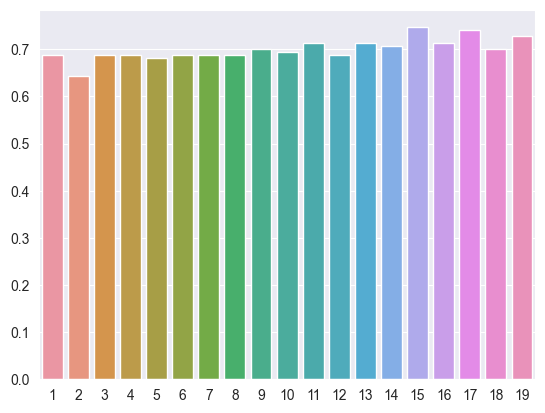

In [49]:
sns.barplot(data = { 'k_values': k_values, 'accuracy': accuracy_list }, x = 'k_values', y = 'accuracy')

In [50]:
model = KNN(n_neighbors = 5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6818181818181818

## Hyperparameter tuning with Grid Search

In [52]:
params = {
    'penalty': ['l1','l2'],
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
}


In [53]:
warnings.filterwarnings('ignore')

In [54]:
clf = GridSearchCV(
    LogisticRegression(), # model for grid search
    param_grid = params,  # hyperparameters value
    scoring='accuracy',   # metric for scoring
    cv=5,                 # number of fold in cross validation
)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [55]:
clf.best_score_

0.7719712115153938

In [56]:
clf.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [57]:
logreg = LogisticRegression(C=0.1, solver='liblinear')

In [58]:
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [59]:
logreg.score(X_test, y_test)

0.7662337662337663

In [60]:
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.7662337662337663